In [2]:
from db_connection import get_connection

db = get_connection()
cursor = db.cursor()
cursor.execute("SELECT COUNT(*) FROM students;")
print(cursor.fetchone())


(3000,)


In [3]:
from db_connection import get_connection

db = get_connection()
cursor = db.cursor(dictionary=True)

query = """
SELECT s.student_id, s.name, SUM(m.marks_obtained) AS total_marks
FROM students s
JOIN marks m ON s.student_id = m.student_id
GROUP BY s.student_id, s.name
ORDER BY total_marks DESC
LIMIT 10;
"""

cursor.execute(query)
for row in cursor.fetchall():
    print(row)


{'student_id': 1679, 'name': 'Triveni Palla', 'total_marks': Decimal('1891')}
{'student_id': 1607, 'name': 'Fitan Bhasin', 'total_marks': Decimal('1859')}
{'student_id': 1057, 'name': 'Tarak Kunda', 'total_marks': Decimal('1854')}
{'student_id': 2451, 'name': 'Dakshesh Goda', 'total_marks': Decimal('1838')}
{'student_id': 999, 'name': 'Nathan Sarin', 'total_marks': Decimal('1836')}
{'student_id': 1083, 'name': 'Harinakshi Natt', 'total_marks': Decimal('1834')}
{'student_id': 1622, 'name': 'Anjali Sanghvi', 'total_marks': Decimal('1833')}
{'student_id': 2613, 'name': 'Yash Madan', 'total_marks': Decimal('1830')}
{'student_id': 2375, 'name': 'Ishaan Kale', 'total_marks': Decimal('1830')}
{'student_id': 872, 'name': 'Falguni Kar', 'total_marks': Decimal('1829')}


In [4]:
query = """
SELECT c.class_id, c.grade, c.section, COUNT(e.student_id) AS total_students
FROM classes c
LEFT JOIN enrollments e ON c.class_id = e.class_id
GROUP BY c.class_id;
"""
cursor.execute(query)
cursor.fetchall()


[{'class_id': 1, 'grade': 1, 'section': 'A', 'total_students': 123},
 {'class_id': 2, 'grade': 1, 'section': 'B', 'total_students': 130},
 {'class_id': 3, 'grade': 2, 'section': 'A', 'total_students': 112},
 {'class_id': 4, 'grade': 2, 'section': 'B', 'total_students': 125},
 {'class_id': 5, 'grade': 3, 'section': 'A', 'total_students': 119},
 {'class_id': 6, 'grade': 3, 'section': 'B', 'total_students': 134},
 {'class_id': 7, 'grade': 4, 'section': 'A', 'total_students': 126},
 {'class_id': 8, 'grade': 4, 'section': 'B', 'total_students': 124},
 {'class_id': 9, 'grade': 5, 'section': 'A', 'total_students': 140},
 {'class_id': 10, 'grade': 5, 'section': 'B', 'total_students': 119},
 {'class_id': 11, 'grade': 6, 'section': 'A', 'total_students': 120},
 {'class_id': 12, 'grade': 6, 'section': 'B', 'total_students': 129},
 {'class_id': 13, 'grade': 7, 'section': 'A', 'total_students': 115},
 {'class_id': 14, 'grade': 7, 'section': 'B', 'total_students': 125},
 {'class_id': 15, 'grade': 8,

In [5]:
query = """
SELECT s.student_id, s.name,
       SUM(CASE WHEN a.status='Present' THEN 1 ELSE 0 END)*100.0 / COUNT(*) AS attendance_percentage
FROM attendance a
JOIN students s ON a.student_id = s.student_id
GROUP BY s.student_id
ORDER BY attendance_percentage DESC;
"""
cursor.execute(query)
cursor.fetchall()


[{'student_id': 1073,
  'name': 'Bimala Palan',
  'attendance_percentage': Decimal('96.70330')},
 {'student_id': 1652,
  'name': 'Om Sengupta',
  'attendance_percentage': Decimal('96.70330')},
 {'student_id': 1992,
  'name': 'Raagini Chaudhary',
  'attendance_percentage': Decimal('96.70330')},
 {'student_id': 1258,
  'name': 'Anusha Sundaram',
  'attendance_percentage': Decimal('95.60440')},
 {'student_id': 2647,
  'name': 'Qarin Ramaswamy',
  'attendance_percentage': Decimal('95.60440')},
 {'student_id': 49,
  'name': 'Vedhika Halder',
  'attendance_percentage': Decimal('94.50549')},
 {'student_id': 190,
  'name': 'Girindra Bali',
  'attendance_percentage': Decimal('94.50549')},
 {'student_id': 583,
  'name': 'Gaurika Munshi',
  'attendance_percentage': Decimal('94.50549')},
 {'student_id': 902,
  'name': 'Aarav Ahuja',
  'attendance_percentage': Decimal('94.50549')},
 {'student_id': 1103,
  'name': 'Neelima Lall',
  'attendance_percentage': Decimal('94.50549')},
 {'student_id': 1626,

In [6]:
query = """
SELECT DATE_FORMAT(paid_on, '%Y-%m') AS month,
       SUM(amount) AS total_collection
FROM fees
WHERE status='Paid'
GROUP BY month
ORDER BY month;
"""
cursor.execute(query)
cursor.fetchall()


[{'month': '2024-04', 'total_collection': Decimal('15270000.00')},
 {'month': '2024-05', 'total_collection': Decimal('16020000.00')},
 {'month': '2024-06', 'total_collection': Decimal('14280000.00')}]

In [7]:
import time
from db_connection import get_connection

db = get_connection()
cursor = db.cursor(dictionary=True)

start = time.time()
cursor.execute("SELECT * FROM students WHERE name LIKE 'A%';")
data = cursor.fetchall()
end = time.time()

print("Rows:", len(data))
print("Execution Time:", end - start, "seconds")


Rows: 339
Execution Time: 0.02006816864013672 seconds


In [8]:
start = time.time()
cursor.execute("""
SELECT s.name, m.subject_id, m.marks_obtained
FROM marks m
JOIN students s ON m.student_id = s.student_id
WHERE marks_obtained > 90;
""")
data = cursor.fetchall()
end = time.time()

print("Rows:", len(data))
print("Execution Time:", end - start, "seconds")


Rows: 10180
Execution Time: 0.18340158462524414 seconds


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from db_connection import get_connection


C:\Users\kaila\AppData\Local\Temp\ipykernel_14600\3825184166.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


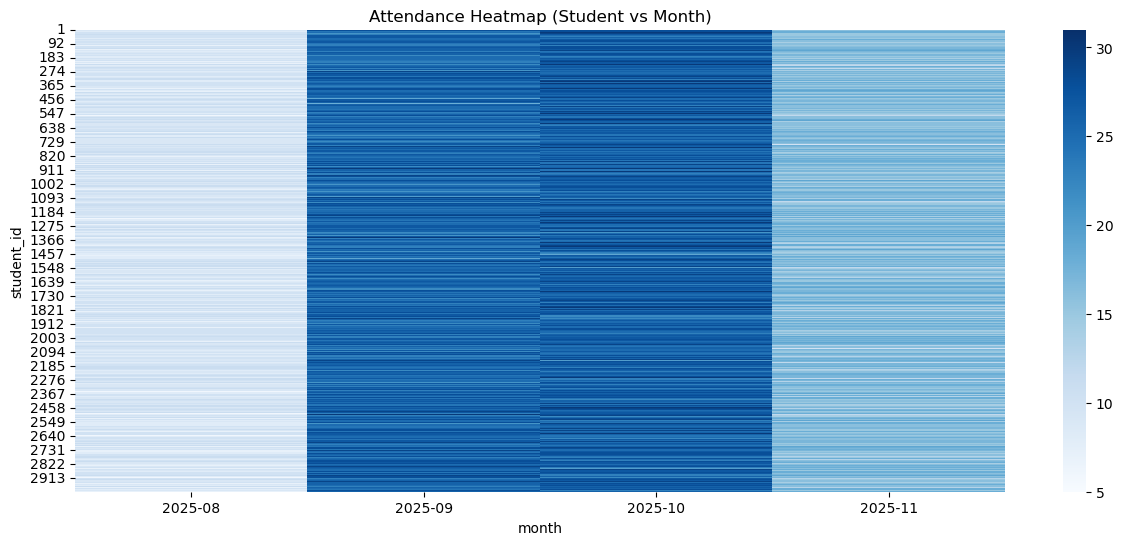

In [15]:
db = get_connection()
query = """
SELECT 
    student_id,
    DATE_FORMAT(date, '%Y-%m') AS month,
    SUM(CASE WHEN status='Present' THEN 1 ELSE 0 END) AS presents
FROM attendance
GROUP BY student_id, month
ORDER BY student_id, month;
"""

df = pd.read_sql(query, db)

pivot = df.pivot(index="student_id", columns="month", values="presents")

plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Attendance Heatmap (Student vs Month)")
plt.show()


C:\Users\kaila\AppData\Local\Temp\ipykernel_14600\1886448490.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


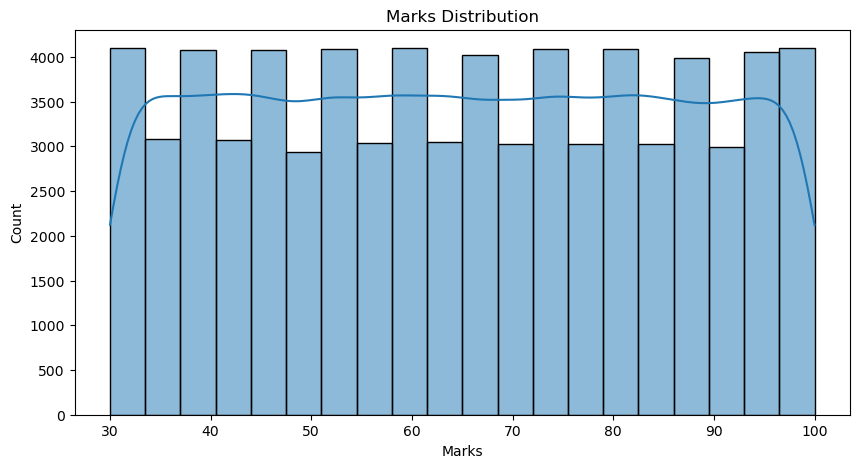

In [16]:
db = get_connection()
query = "SELECT marks_obtained FROM marks;"
df = pd.read_sql(query, db)

plt.figure(figsize=(10,5))
sns.histplot(df['marks_obtained'], bins=20, kde=True)
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Count")
plt.show()


C:\Users\kaila\AppData\Local\Temp\ipykernel_14600\3987297581.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


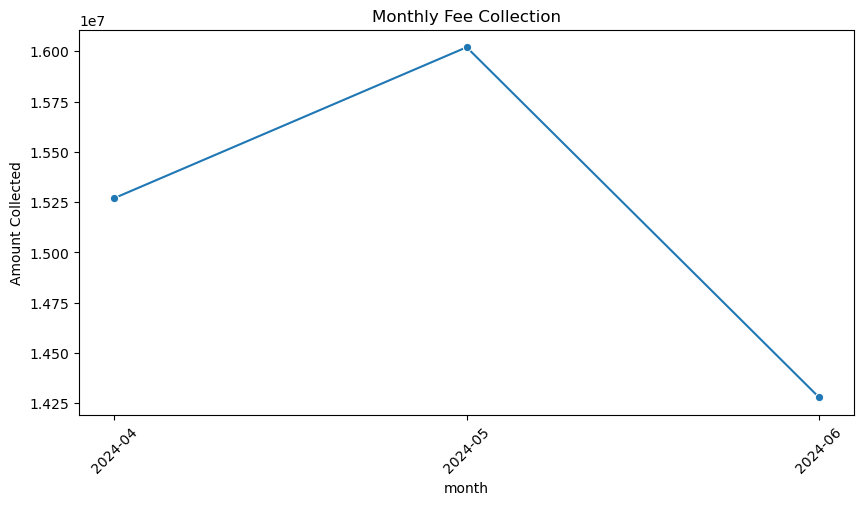

In [17]:
db = get_connection()
query = """
SELECT DATE_FORMAT(paid_on, '%Y-%m') AS month,
       SUM(amount) AS total_collection
FROM fees
WHERE status='Paid'
GROUP BY month
ORDER BY month;
"""

df = pd.read_sql(query, db)

plt.figure(figsize=(10,5))
sns.lineplot(x="month", y="total_collection", data=df, marker="o")
plt.title("Monthly Fee Collection")
plt.xticks(rotation=45)
plt.ylabel("Amount Collected")
plt.show()


C:\Users\kaila\AppData\Local\Temp\ipykernel_14600\2039819444.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


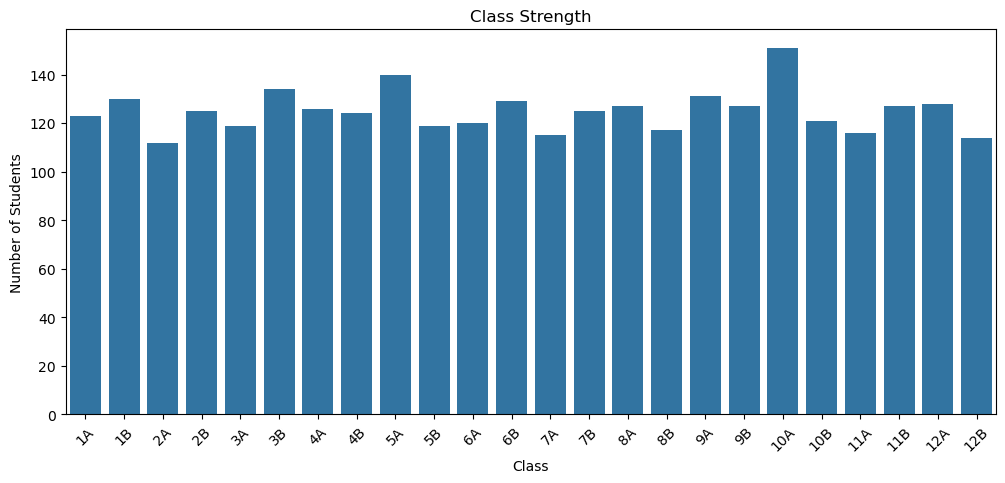

In [18]:
db = get_connection()
query = """
SELECT c.grade, c.section, COUNT(e.student_id) AS strength
FROM classes c
LEFT JOIN enrollments e ON c.class_id = e.class_id
GROUP BY c.class_id;
"""

df = pd.read_sql(query, db)
df["class"] = df["grade"].astype(str) + df["section"]

plt.figure(figsize=(12,5))
sns.barplot(x="class", y="strength", data=df)
plt.title("Class Strength")
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()
